In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
data_vaksinasi_wilayah  = pd.read_csv("../data/Vaksinasi Wilayah.csv",index_col=False)
data_vaksinasi_wilayah.fillna(0, inplace=True)
# data_vaksinasi_wilayah.drop('Unnamed: 0',axis=1,inplace=True)

data_vaksinasi_wilayah.head()

,No.,Kecamatan,Kota / Kabupaten,Target Total per Kecamatan,Target Harian per Kecamatan,Cakupan 13 Jan - 11 Juni,Unnamed: 6,Unnamed: 7,Cakupan 12 Juni,Unnamed: 9,...,Unnamed: 2122,Cakupan 18 Mei 2023,Unnamed: 2124,Unnamed: 2125,Cakupan 19 Mei 2023,Unnamed: 2127,Unnamed: 2128,Cakupan 20 Mei 2023,Unnamed: 2130,Unnamed: 2131
0,No.,Kecamatan,Kota / Kabupaten,Target Total per Kecamatan,Target Harian per Kecamatan,Cakupan Suntik 1,Keterangan,Cakupan Suntik 2,Cakupan Suntik 1,Keterangan,...,Cakupan Suntik 2,Cakupan Suntik 1,Keterangan,Cakupan Suntik 2,Cakupan Suntik 1,Keterangan,Cakupan Suntik 2,Cakupan Suntik 1,Keterangan,Cakupan Suntik 2
1,1,Cakung,Jakarta Timur,515628,5333,74966,Tidak Tercapai,37590,897,Tidak Tercapai,...,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0
2,2,Cengkareng,Jakarta Barat,519118,5041,85668,Tidak Tercapai,47581,429,Tidak Tercapai,...,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0
3,3,Kali Deres,Jakarta Barat,406018,4295,42991,Tidak Tercapai,23222,162,Tidak Tercapai,...,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0
4,4,Cilincing,Jakarta Utara,392136,4073,41494,Tidak Tercapai,22305,17,Tidak Tercapai,...,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0,0,Tidak Tercapai,0


In [3]:
#cleaning data
new_columns =data_vaksinasi_wilayah.loc[0].tolist()

testing = data_vaksinasi_wilayah.drop(0)
testing.columns = new_columns
testing.drop(columns="No.",axis=1,inplace=True)
testing.drop(columns="Keterangan", axis=1,inplace=True)


In [4]:
for column in testing.columns:
    for index, row in testing.iterrows():
        value = row[column]
        if isinstance(value, str) and value.isdigit():
            # cleaned_value = value.replace(",", "")
            converted_value = int(float(value))
            testing.at[index, column] = converted_value
            
baru = testing.sort_values(by='Target Total per Kecamatan',ascending=False)

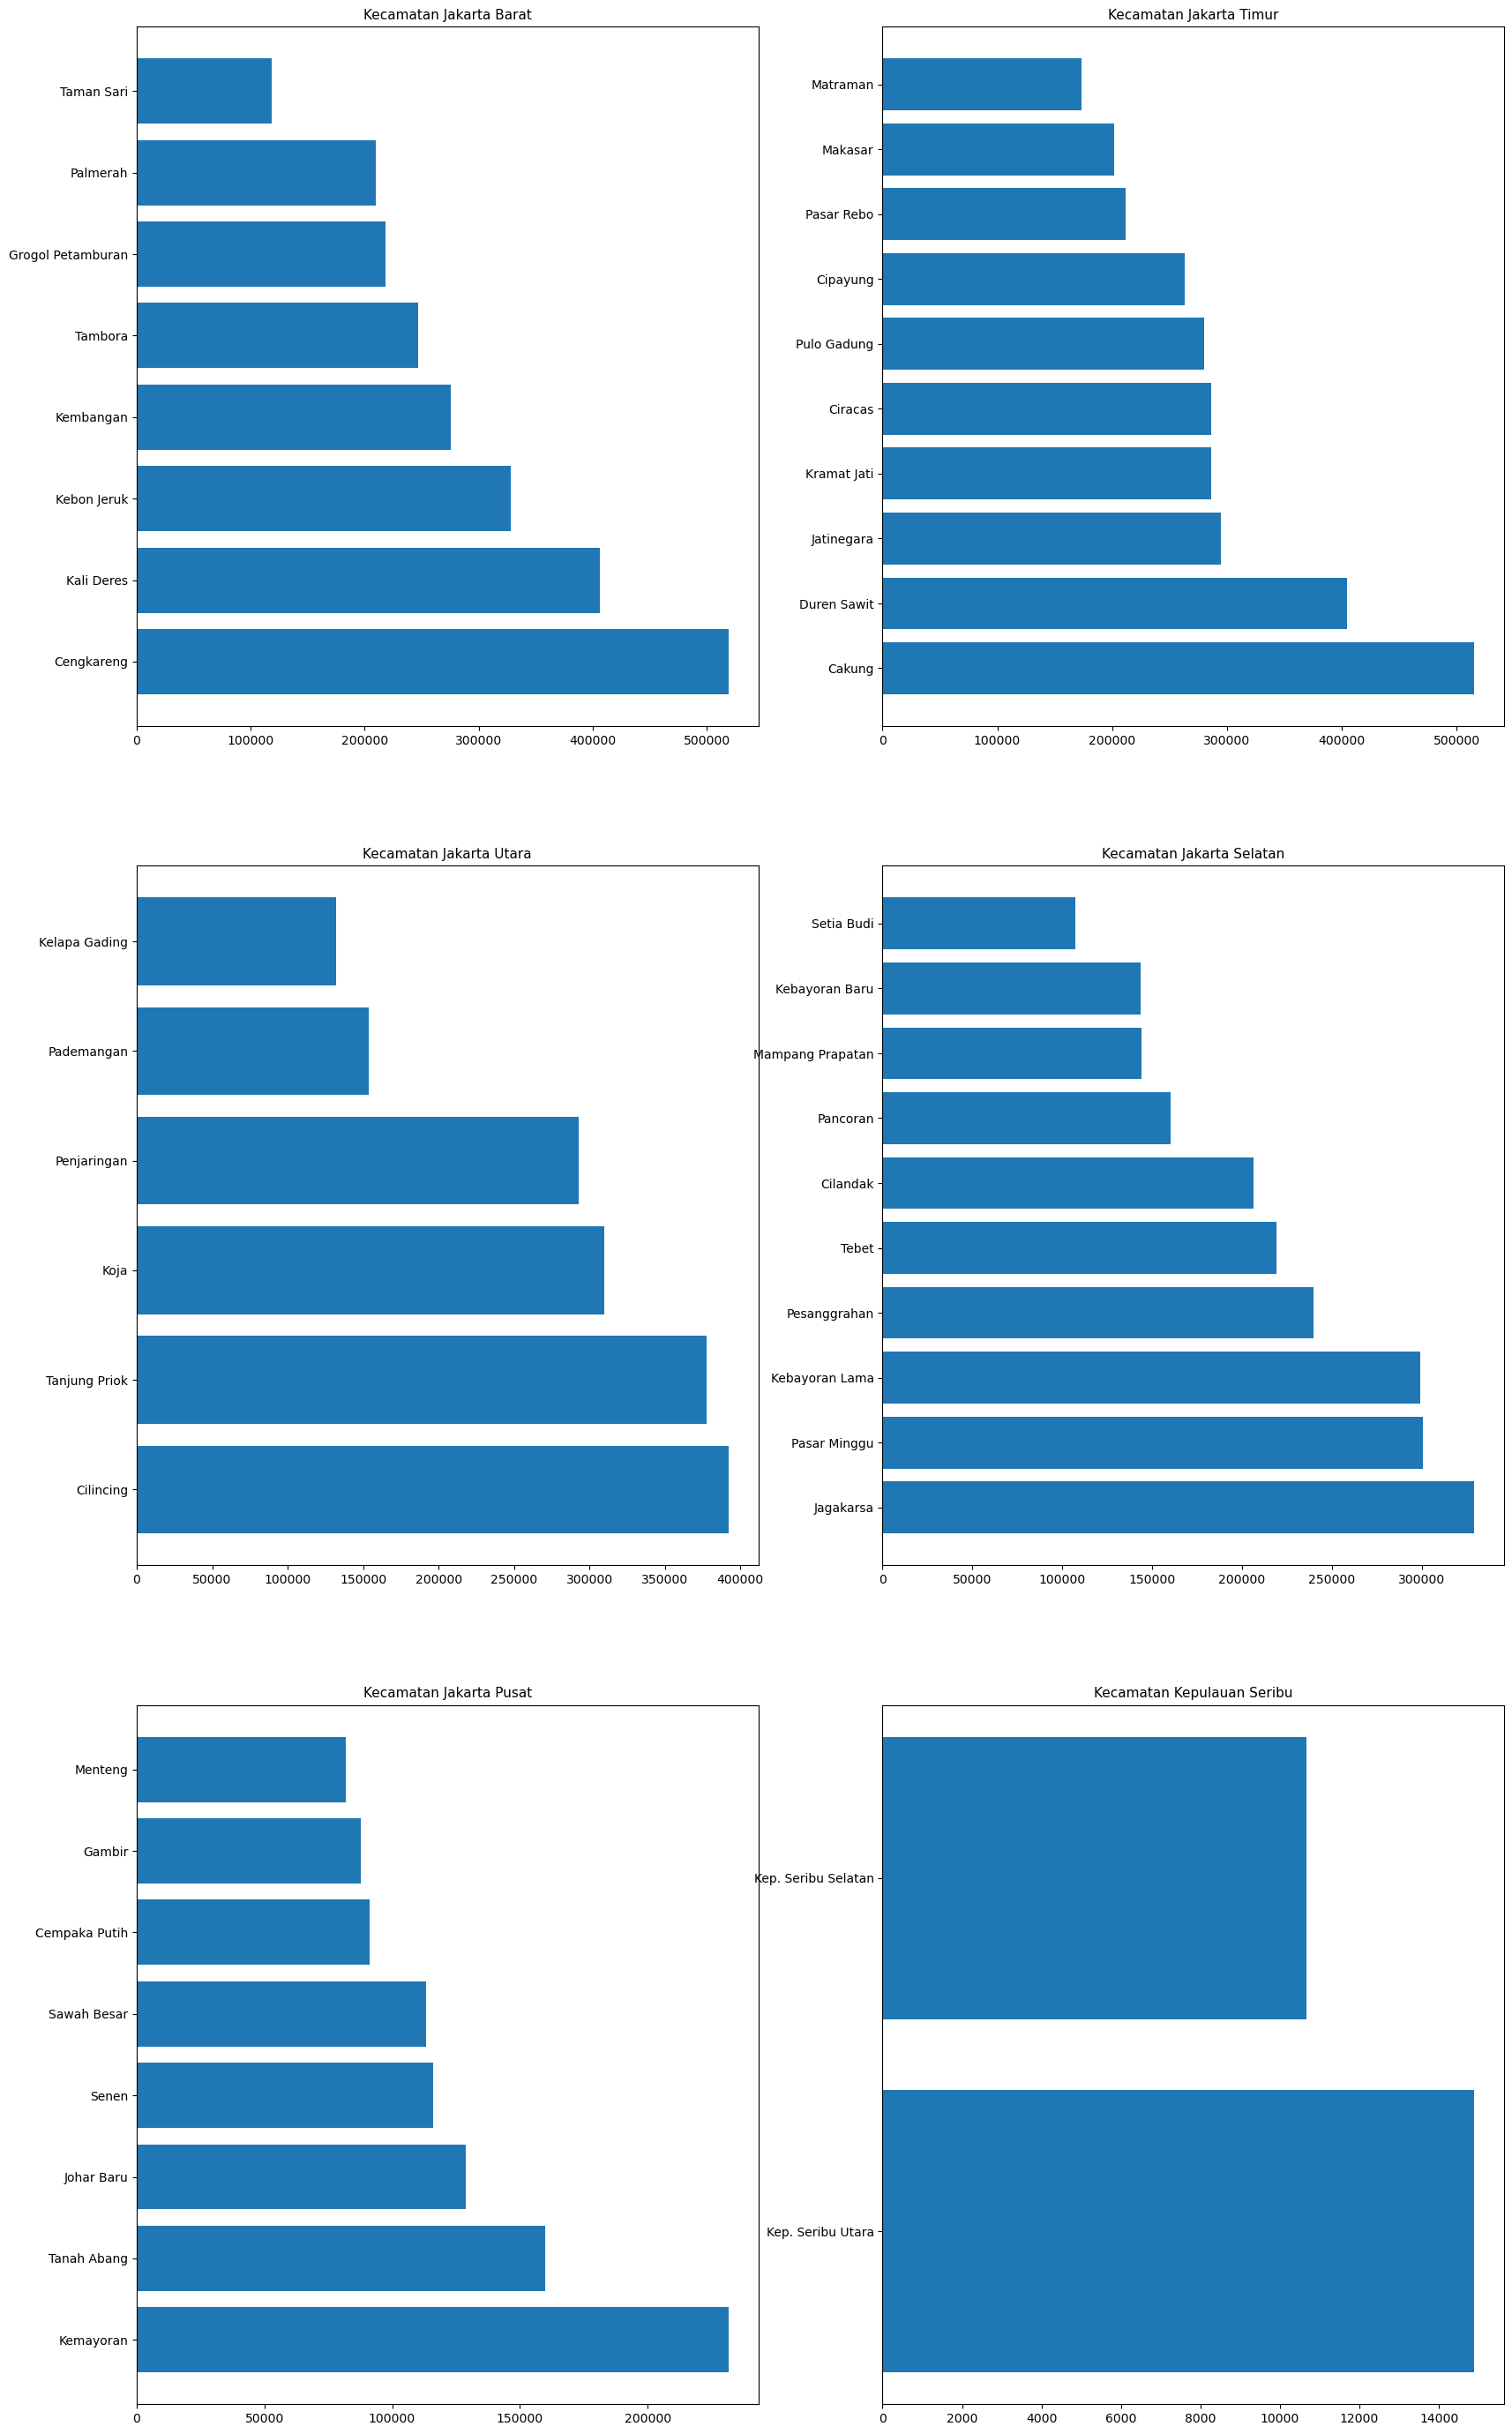

In [5]:
list_kota = baru["Kota / Kabupaten"].unique()

baru



fig, axes = plt.subplots(ncols=2, nrows=3, figsize=(20, 35))


for i, kota in  enumerate(list_kota):
    ax = axes[i//2, i%2]
    filtered_columns = baru.loc[data_vaksinasi_wilayah["Kota / Kabupaten"] == kota]
    ax.barh(filtered_columns["Kecamatan"],filtered_columns['Target Total per Kecamatan'])
    # sns.barplot(filtered_columns["Kecamatan"],filtered_columns['Target Total per Kecamatan']).add(sns.Bar())
    axes[i//2, i%2].set_title("Kecamatan {}".format(kota),fontsize=11)
    
    
    
plt.show()


